![image](https://www.houston-perio.com/wp-content/uploads/2019/07/STROKE.jpg)
# 1.1 Background
According to Mayo clinic **"An ischemic stroke occurs when the blood supply to part of the brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes.A stroke is a medical emergency, and prompt treatment is crucial."**
The goal of this project is use machine learning to predict if a person will have stroke based on some features

**Data**  
1) id: unique identifier  
2) gender: "Male", "Female" or "Other"  
3) age: age of the patient  
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension  
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease  
6) ever_married: "No" or "Yes"  
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"  
8) Residence_type: "Rural" or "Urban"  
9) avg_glucose_level: average glucose level in blood  
10) bmi: body mass index  
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*  
12) stroke: 1 if the patient had a stroke or 0 if not  

[Data source](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

## 1.1.1 Import relevant libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

## 1.1.2 Load Datasets

In [31]:
orig_df = pd.read_csv('Resources/healthcare-dataset-stroke-data.csv')
# View first 5 rows
orig_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# 1.2 Data Cleaning

In [32]:
# Creating a checkpoint
df = orig_df.copy()
# Displaying df
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Observation**  
* The id column is unique values, hence it has no importance to the model, hence it can be dropped

In [33]:
# Dropping the id column
df = df.drop(columns='id')
# Getting information on train_set1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


**Observation**
* All the data are of the right data types 
* BMI column contains missing values
* Since the number of missing values is not high, They will be replaced with mean

In [34]:
# Checking the bmi column
df['bmi'] = df['bmi'].fillna(value=df['bmi'].mean())
print('Missing values per column:')
print(df.isnull().sum())

Missing values per column:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


### 1.2.1 Checking Categorical Variaables

In [35]:
# Checking the gender column
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

**The other must be dropped because it is single data and will cause problems during label encoding**

In [36]:
# Filtering Other in gender
df = df[df['gender'] != 'Other']
# Checking ever_married column
df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [37]:
# Checking the work_type column
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [38]:
# Checking the Residence_type column
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [39]:
# Checking smoking status
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

### 1.2.2 Checking Numerical Variaables

In [40]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.894508,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Observation**
* Although the maximum of some numerical value is very high, they are not impossible values. Hence the data contains no outlier

* Hence the data is cleaned

* To end the data cleaning process, the data is split into train_set and test_set

### 1.2.3 Splitting the data

In [41]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=1, stratify=df['stroke'])
# Reset index
train_set.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)

## 1.3 Exploratory Data Analysis

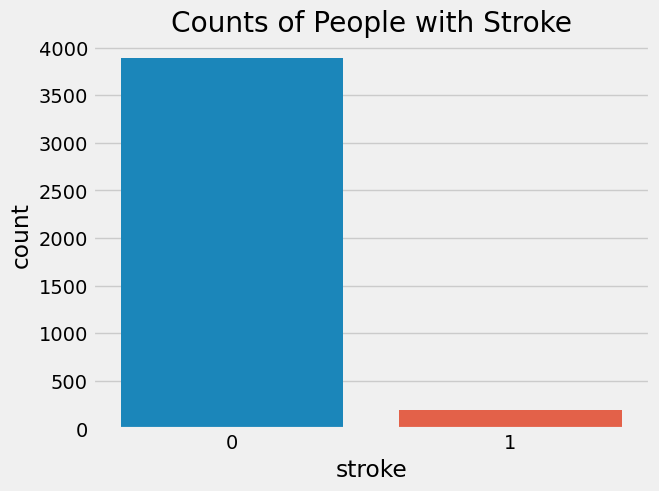

In [42]:
# Checking the number of people with stroke
sns.countplot(x='stroke',data=train_set)
plt.title("Counts of People with Stroke")
plt.savefig('images/Counts of People with Stroke.png')
plt.show()

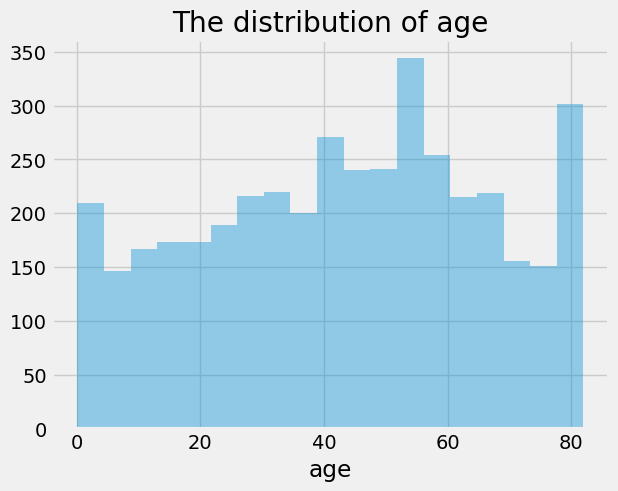

In [43]:
# Checking the distribution of age
sns.distplot(train_set['age'], kde=False)
plt.title('The distribution of age')
plt.savefig('images/The distribution of age.png')
plt.show()

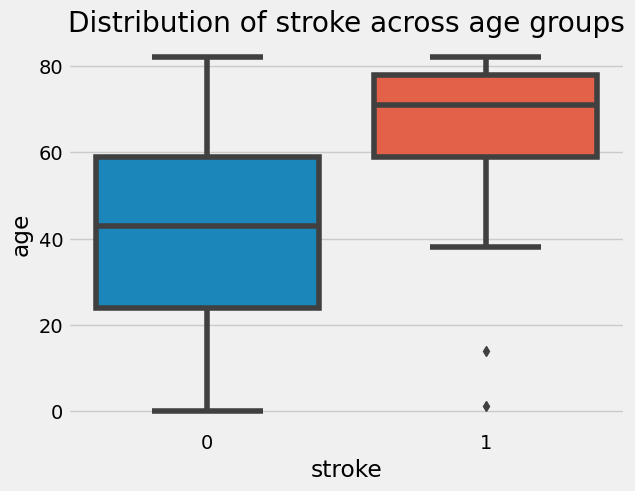

In [44]:
# Checking how Stroke is distributed among age groups
sns.boxplot(y='age',x='stroke',data=train_set)
plt.title('Distribution of stroke across age groups')
plt.savefig('images/Distribution of stroke across age groups.png')
plt.show()

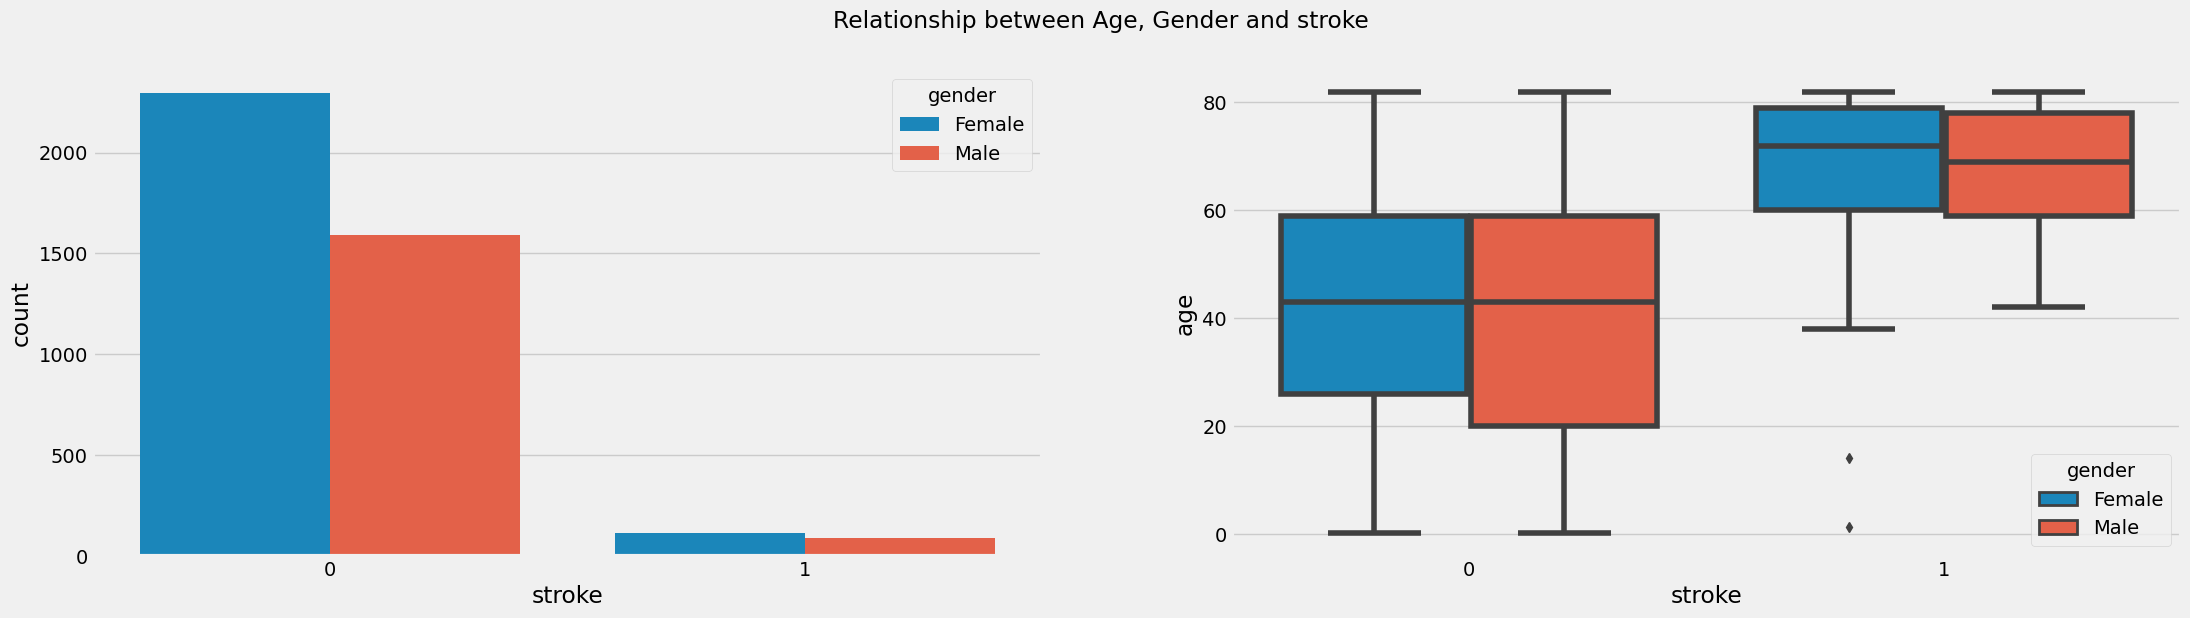

In [45]:
# Checking the relaationship between age, stroke and Gender
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (24, 6))
sns.countplot(x='stroke',hue='gender', data=train_set,ax=ax1)
sns.boxplot(y='age',x='stroke',hue='gender',data=train_set, ax=ax2)
fig.suptitle('Relationship between Age, Gender and stroke')
plt.savefig('images/Relationship between Age, Gender and stroke.png')
plt.show()

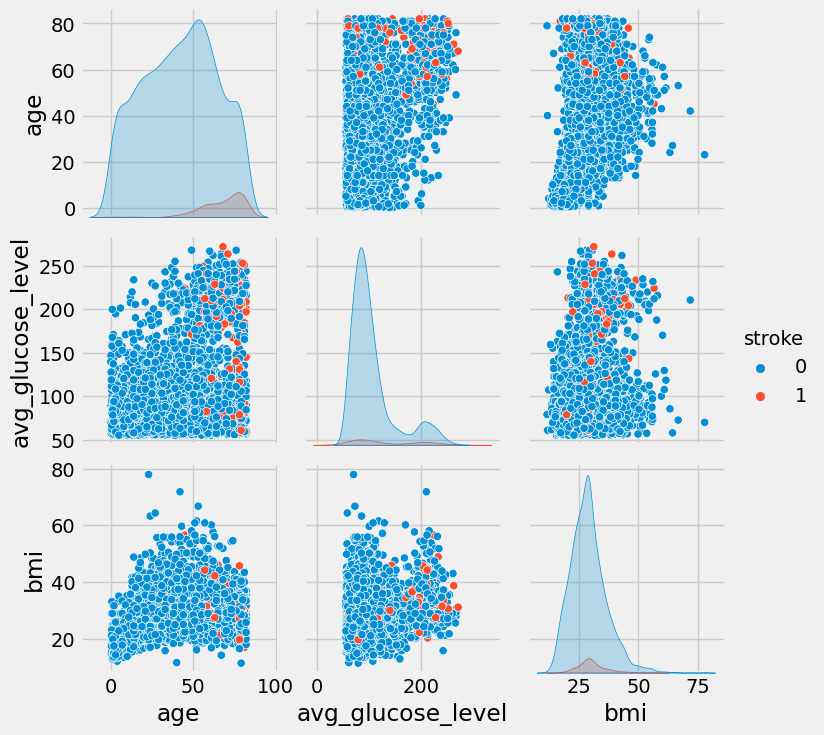

In [46]:
# Checking the relationship between the numerical variables and stroke
sns.pairplot(train_set[['age','avg_glucose_level','bmi','stroke']],hue='stroke')

plt.show()

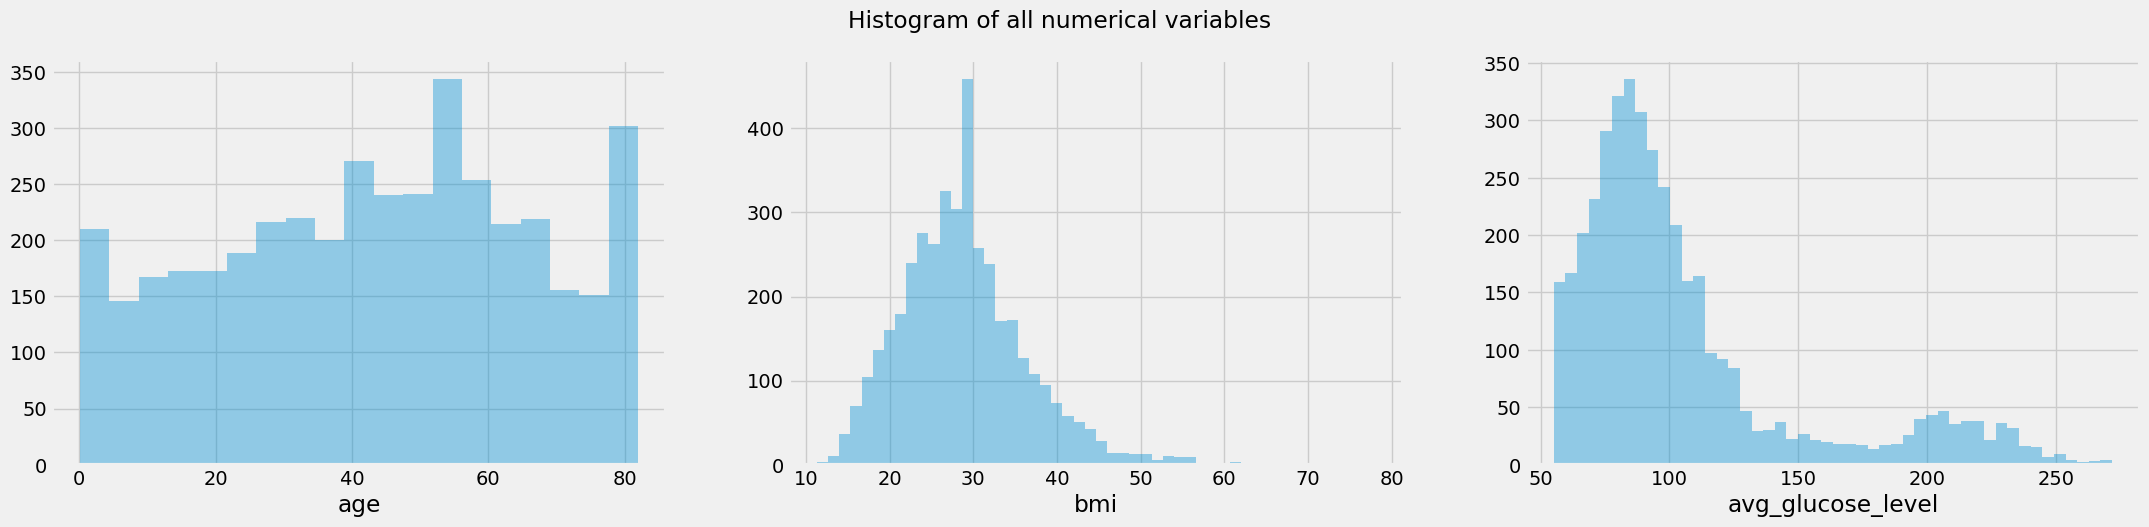

In [21]:
# Histogram of all numerical variables
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(24,5))
sns.distplot(train_set['age'], kde=False, ax=ax1)
sns.distplot(train_set['bmi'], kde=False, ax=ax2)
sns.distplot(train_set['avg_glucose_level'], kde=False, ax=ax3)
fig.suptitle('Histogram of all numerical variables')
plt.savefig('images/Histogram of all numerical variables.png')
plt.show()

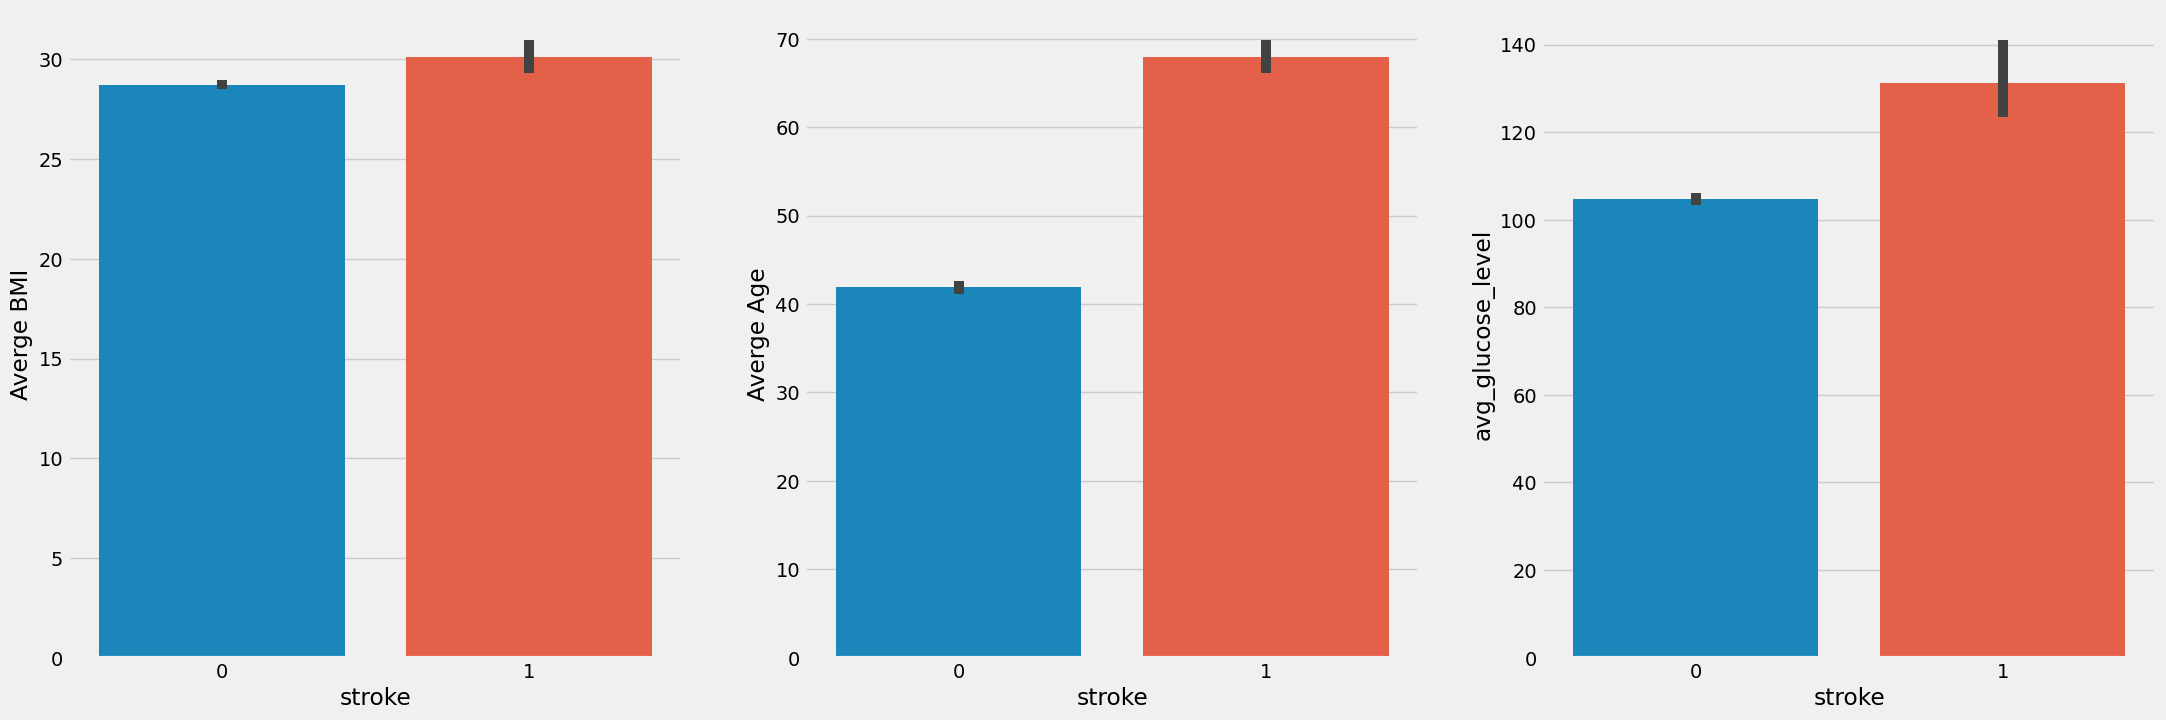

In [22]:
# Average of Each Numerical vaariable VS Stroke Variable
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (24, 8))
sns.barplot(x='stroke',y='bmi', data=train_set,ax=ax1)
ax1.set_ylabel('Averge BMI')
sns.barplot(x='stroke',y='age', data=train_set,ax=ax2)
ax2.set_ylabel('Averge Age')
sns.barplot(x='stroke',y='avg_glucose_level', data=train_set,ax=ax3)
ax3.set_ylabel('avg_glucose_level')
plt.savefig('images/Average of Each Numerical vaariable VS Stroke Variable.png')
plt.show()

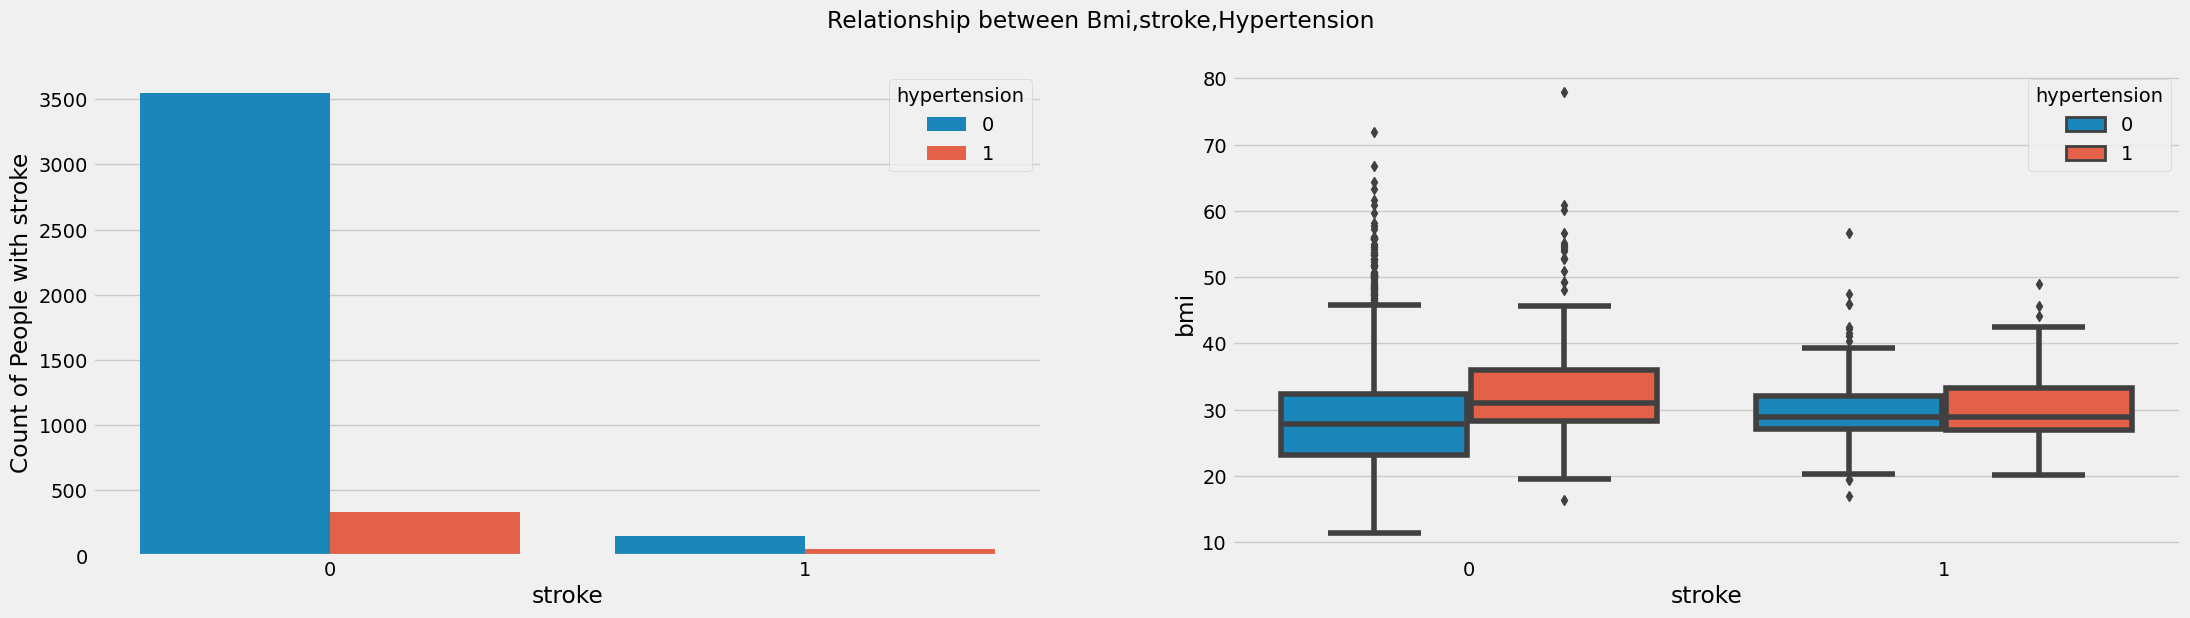

In [23]:
# Checking the relaationship between bmi, stroke and Hypertension
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (24, 6))
sns.countplot(x='stroke',hue='hypertension', data=train_set,ax=ax1)
ax1.set_ylabel('Count of People with stroke')
sns.boxplot(y='bmi',x='stroke',hue='hypertension',data=train_set, ax=ax2)
fig.suptitle('Relationship between Bmi,stroke,Hypertension')
plt.savefig('images/Relationship between Bmi,stroke,Hypertension.png')
plt.show()

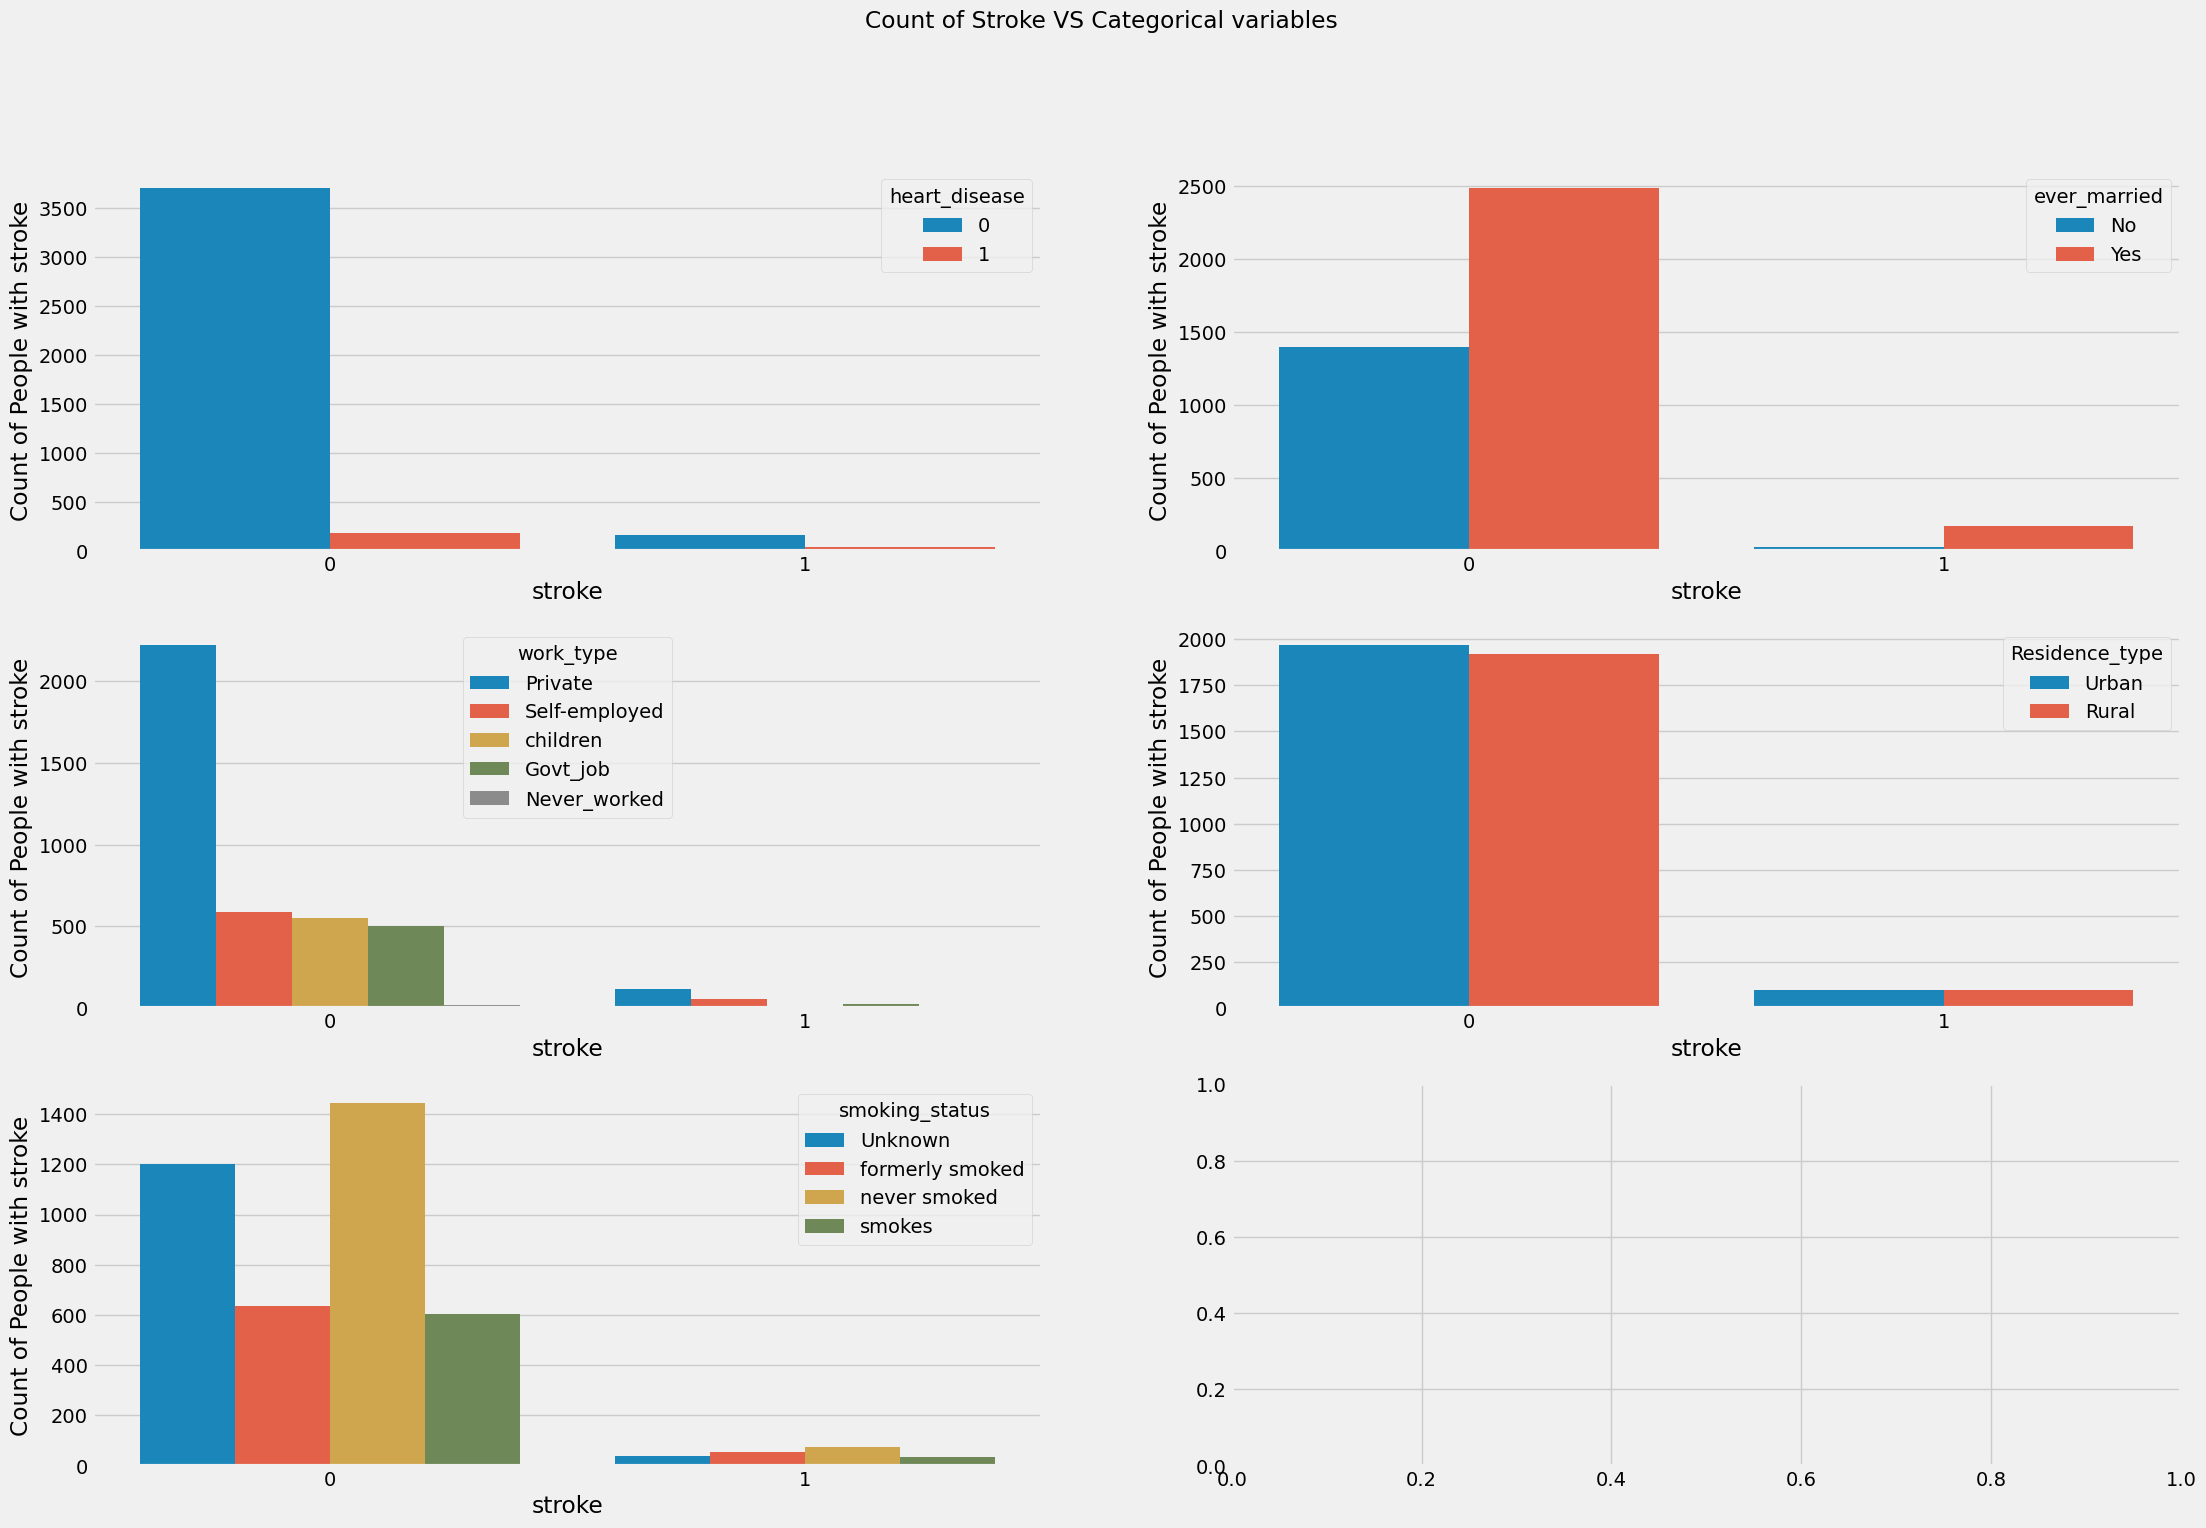

In [24]:
# Count of Stroke VS Each Independent Variable
fig, ax = plt.subplots(3,2, figsize = (24, 16))
sns.countplot(x='stroke',hue='heart_disease', data=train_set,ax=ax[0,0])
ax[0,0].set_ylabel('Count of People with stroke')
sns.countplot(x='stroke',hue='ever_married', data=train_set,ax=ax[0,1])
ax[0,1].set_ylabel('Count of People with stroke')
sns.countplot(x='stroke',hue='work_type', data=train_set,ax=ax[1,0])
ax[1,0].set_ylabel('Count of People with stroke')
sns.countplot(x='stroke',hue='Residence_type', data=train_set,ax=ax[1,1])
ax[1,1].set_ylabel('Count of People with stroke')
sns.countplot(x='stroke',hue='smoking_status', data=train_set,ax=ax[2,0])
ax[2,0].set_ylabel('Count of People with stroke')
fig.suptitle("Count of Stroke VS Categorical variables")
plt.savefig('images/Count of Stroke VS Categorical variables.png')
plt.show()

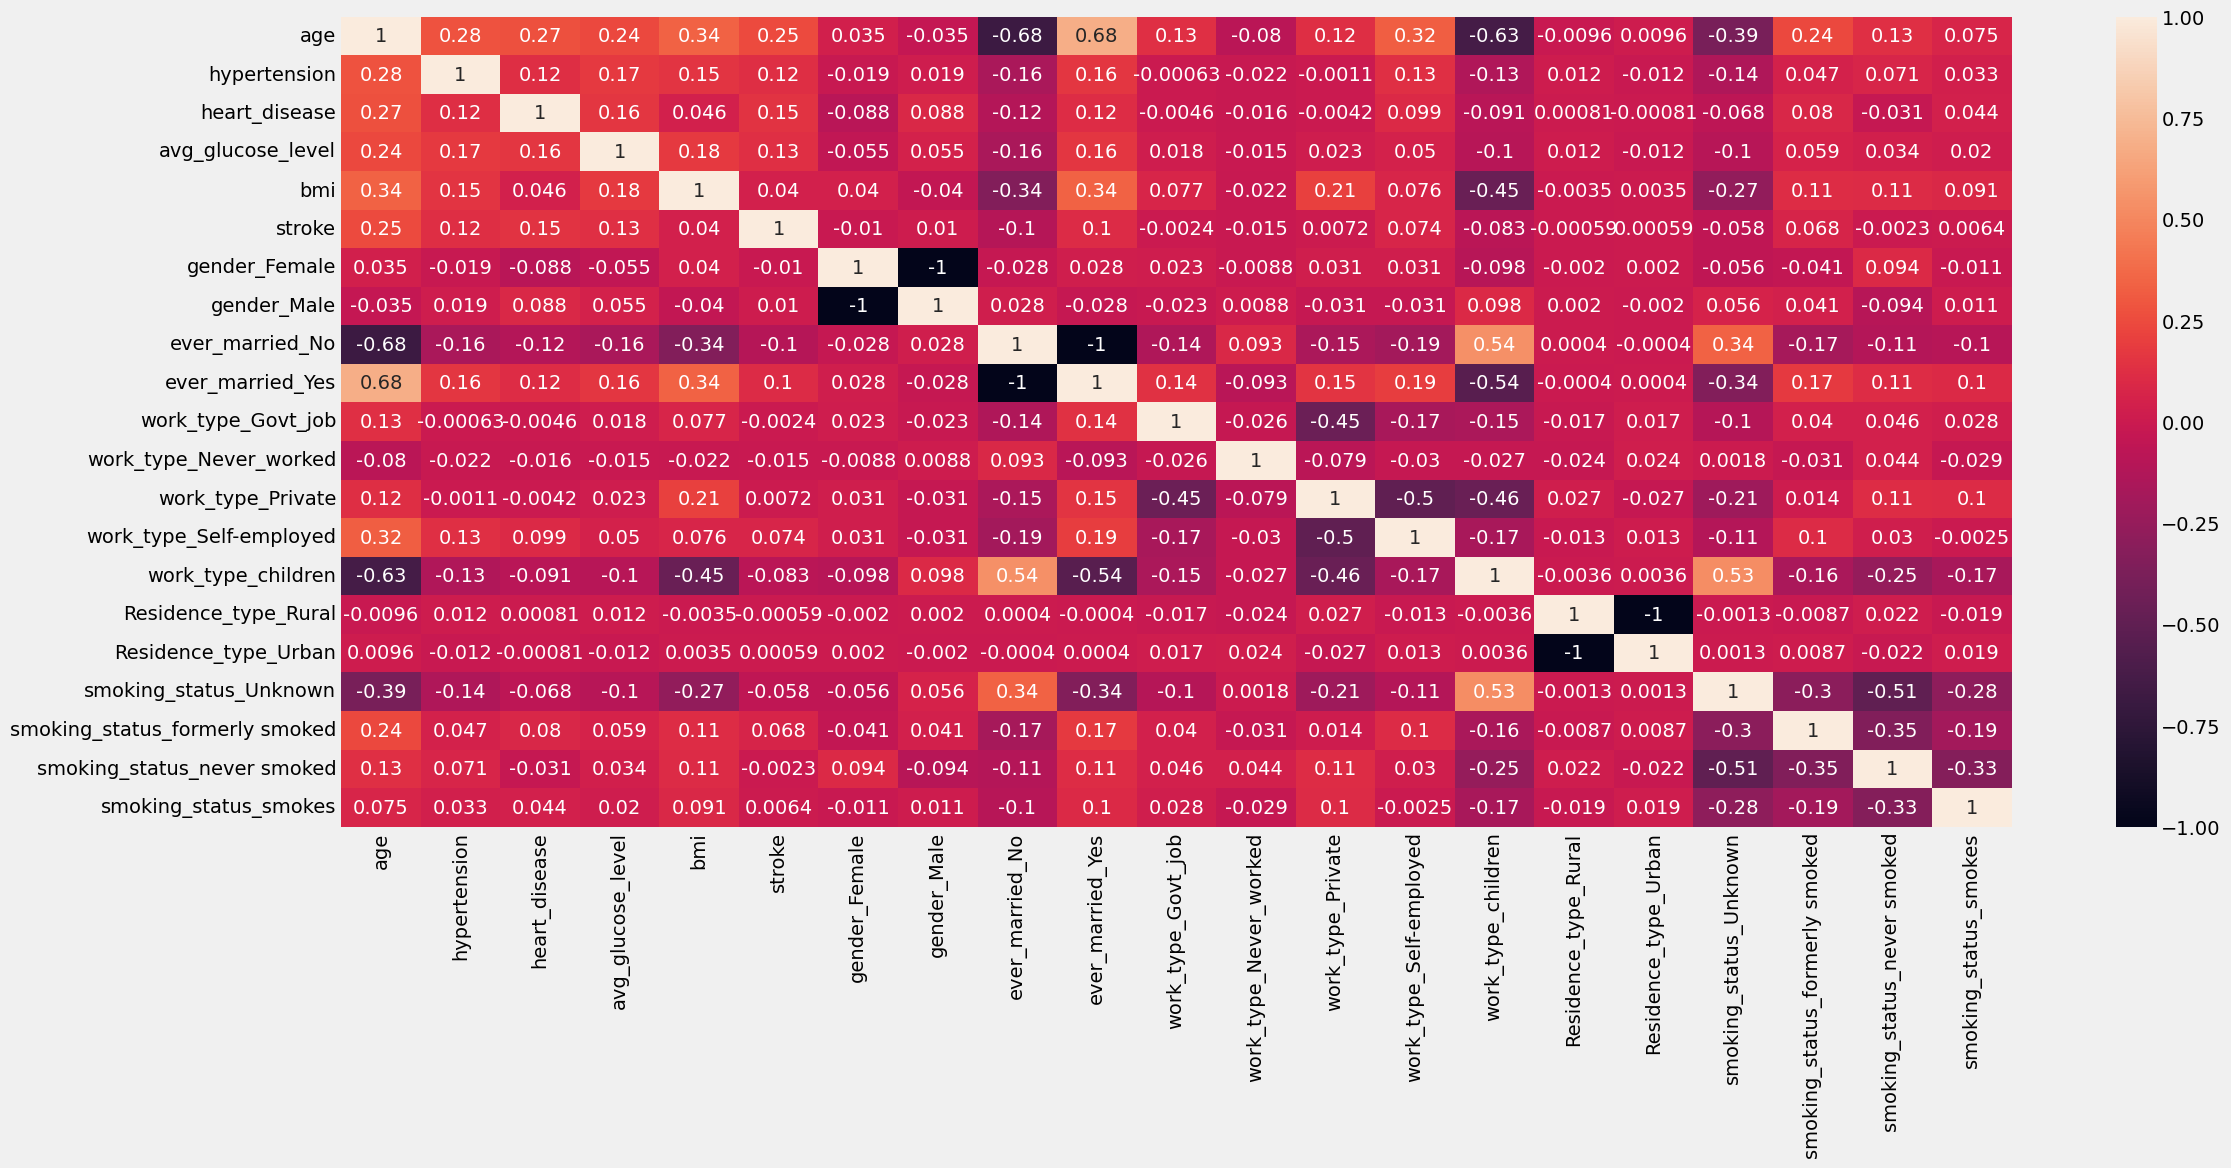

In [29]:
# Correlation Plot
plt.figure(figsize=(24, 10))
sns.heatmap(pd.get_dummies(train_set).corr(), annot= True)
plt.savefig('images/Correlation Plot.png')
plt.show()

**Observation**
* Age is partially normally distributed while avg_glucose_level and Bmi are rightly skewed
* Stroke is associted with the older population
* Stroke is higher in people with high average glucose level
* Stroke is more common in women
* Stroke is higher in people with high bmi.
* Married people are more susceptible to stroke
* Age, Hypertension, Heart disease and average glucose level are the most correlated to stroke

## 1.4 Data Preprocessing

###  1.4.1 Seperating Features from target

In [26]:
# Getting the train_set targets
train_target = train_set['stroke']
# Getting train_set predictors
train_inputs = train_set.drop('stroke',axis=1)

## 1.4.2 Creating data preprocessing pipeline

In [27]:
# Initializing standardscalar
scalar = StandardScaler()
# Selecting Columns to scale
feature_to_scale = train_inputs[['age','bmi','avg_glucose_level']]
# Scaling those columns
feature_scaled = scalar.fit_transform(feature_to_scale)
# Putting scaled values into the table
train_inputs[['age','bmi','avg_glucose_level']] = feature_scaled
# Getting dummy variables for categorical variables
train_inputs_scaled = pd.get_dummies(train_inputs)
train_inputs_scaled.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-0.929731,0,0,0.157082,-1.195102,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
1,-0.005985,0,0,-0.412776,1.445891,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0
2,-1.105682,0,0,-0.380847,0.981395,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0
3,-1.677525,0,0,-0.716997,-0.531536,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0
4,-0.049973,0,0,-0.838951,0.291286,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0


In [28]:
# Creating Data preprocessing functions
def data_preprocesor(df):
    df_1 = df['stroke']
    df_2 = df.drop('stroke',axis=1)
    feature_to_scale = df_22[['age','bmi','avg_glucose_level']]
    # Scaling those columns
    feature_scaled = scalar.fit_transform(feature_to_scale)
    # Putting scaled values into the table
    df_2[['age','bmi','avg_glucose_level']] = feature_scaled
    # Getting dummy variables for categorical variables
    df_2_scaled = pd.get_dummies(df_2)
    return df_1, df_2